In [1]:
import pandas as pd
import os


#Due to related budget cuts, the most recent fiscal data you have to work with is from 2015-16. Download the
#2015-16 district-level fiscal data from the National Center for Education Statistics’ Common Core of Data:

fiscal_df = pd.read_table('data/Sdf16_1a.txt')

#For helping you make your decision, it may be helpful to have some performance metrics for each district.
#You can download the 2015-16 data for distrct-level statistics on graduation rate and state assessments on
#mathematics and reading/language arts from the EDFacts website:

perform_math_df = pd.read_csv('data/math-achievement-sch-sy2015-16.csv')
perform_read_df = pd.read_csv('data/rla-achievement-sch-sy2015-16.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,15,19,21,23,27,33,35,37,39,47,51,53,55,57,59,63,65,69,71,77,79,81,85,87,91,99,103,107,109,111,113,115,117,119,121,123,131,133,135,137,143,145,147,149,151,155,161,165,167,173,175,177,179,187,191,193,195,201,203,209,217,219,221,223,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,19,21,23,27,33,35,37,39,41,47,51,53,55,57,61,67,77,79,81,83,85,87,91,103,105,107,109,111,113,115,117,121,123,125,131,133,135,137,139,145,147,149,151,159,

In [2]:
fiscal_df

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18703,5680250,51502040100000,56,56039,N,27220,Region V BOCES,Wyoming,WY,07,...,N,N,N,N,N,N,N,N,N,N
18704,5680251,N,56,56021,N,16940,Wyoming Department of Family Services,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18705,5680252,N,56,56005,N,23940,Youth Emergency Services Inc. - Administration...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N
18706,5680253,N,56,56025,N,16220,Wyoming Behavioral Institute - Administration ...,Wyoming,WY,N,...,N,N,N,N,N,N,N,N,N,N


### Problem 1 <br>
Import and explore the district-level fiscal data from 2015-16. <br>
Rank and visualize the states that take in the most federal funding (revenue).<br>
Which states spend the most federal funding per student? <br>

In [3]:
[x for x in fiscal_df.columns if 'TOTAL' in x]



['TOTALREV', 'TOTALEXP']

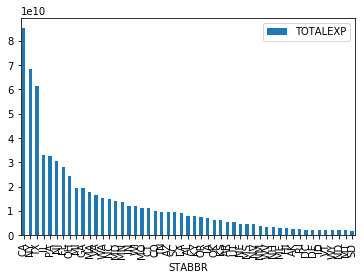

In [4]:
import matplotlib
%matplotlib inline
fiscal_df.groupby(['STABBR']).sum().sort_values(by = ['TOTALEXP'], ascending = False).reset_index().plot(kind = 'bar', 
                                                                                                       x = 'STABBR',
                                                                                                       y = 'TOTALEXP')
#fiscal_df.sort_values(by = ['TOTALEXP'], ascending = False).iloc[0:20]

In [5]:
df_totalexp = fiscal_df.groupby(['STABBR']).sum().sort_values(by = ['TFEDREV'], ascending = False).reset_index()

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')


In [ ]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations=df_totalexp['STABBR'], # Spatial coordinates
    z = df_totalexp['TFEDREV'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
   # colorscale = 'Reds',
    colorbar_title = "total expenditures ($)",
))

fig.update_layout(
    title_text = 'Total Expenditures on Education by state k-12',
    geo_scope='usa', # limite map scope to USA
)

fig.write_image("figures/total_fedrev_by_state.png")

fig.show()

### Problem 2 <br>
Visualize the relationship between school districts’ total revenue and expenditures. <br>
Which states have the most debt per student?<br>



In [ ]:
fiscal_df.groupby(['STABBR']).sum().reset_index().plot(kind = 'scatter', x = 'TOTALREV', y = 'TOTALEXP')

In [ ]:
import os

os.getcwd()

In [ ]:
fiscal_df.groupby(['STABBR']).sum().reset_index().to_csv('/Users/zlatanferic/Dropbox/temp/fiscal_df.csv', index = False)

In [ ]:
#Debt is probably expenditures - revenue (in this case maybe even more as goverement gives tax and funding cuts to schools)

In [ ]:
dff = fiscal_df.groupby(['STABBR']).sum().reset_index()
dff['debt_ratio'] = dff['TOTALEXP'] / dff['TOTALREV']
dff.sort_values(by = 'debt_ratio', ascending = False).head()

In [ ]:
#North Dakota has the highest debt-to-income Ratio

### Problem 3 <br>

The district-level performance metrics from EDFacts may be useful in your decision. <br>
However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students <br>
from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In <br>
addition, censored and missing data must be imputed. <br>
Write and explain a function for processing a single column of “blurred” metrics into usable numeric values.<br>
Use it to process and then visualize the distribution of a performance metric of your choice. <br>

In [ ]:
perform_math_df.shape

In [ ]:
perform_math_df.head()

In [ ]:
perform_math_df['ALL_MTH00PCTPROF_1516'].unique()

In [ ]:
perform_read_df['ALL_RLA00PCTPROF_1516'].unique()

For rates that are privacy protected, some of the privacy protections use the following symbols and translations: <br>
•	Greater than or equal to  =  ≥  =  GE <br>
•	Less than or equal to =  ≤  =  LE <br>
•	Greater than  =  >  =  GT <br>
•	Less than  =  <  =  LT <br>
•	Data suppressed to protect student privacy = PS <br>
For example, a graduation rate in the data file displaying “GE50” means the rate for that particular subgroup is “greater than or equal to 50%.” See table below for additional explanation of the way privacy protection for various student counts are applied. <br>


In [ ]:
## couple considerations for the preprocessing function

## depending on how we implement we can only use raw data or impute

## we can use upper or lower intervals on range, or use mean value

## we can include / exclude GE, LE, etc.. 

## dealing with PS - impute with state level mean/mode, or exclude completely

## THe preprocessing can have a large effect on what we get back

In [ ]:
import numpy as np
#preprocess the data
#takes in an item and range (0 = lower, 1 = upper for values suchas (44-55).. i.e. 0 would chose 44)
def process_col(item,opt1, opt2):
    
    
    #range givem.. can chose upper or lower based on input
    if len(item.split('-')) > 1:
        
        if opt1 == 1:
            lower = int(item.split('-')[0])
            upper = int(item.split('-')[1])
            #this is themidpoint of the interval
            act = (upper - lower)/ 2 + lower
        
        elif opt1 == 2:
            act = int(item.split('-')[0])
        elif opt1 == 3:
            act = int(item.split('-')[1])
    
    #case less than/equal to
    elif 'LE' in item:
        if opt2 == 1:
            act = int(item.replace('LE',''))
        if opt2 == 2:
            act = -85
    #case greater than
    elif 'GE' in item:
        if opt2 == 1:
            act = int(item.replace('GE',''))
        if opt2 == 2:
            act = -85
    #case less than
    elif 'LT' in item:
        if opt2 == 1:
            act = int(item.replace('LT',''))
        if opt2 == 2:
            act = -85
    elif 'PS' in item:
        #code for act
        
        ## this is a problem
        ## if a lot is missing will be skewed tlower significantly based on missingness 
        act = np.nan
    else:
        try:
            act = int(item)
        except: 
            #error code.. something went wrong
            act = -6
            
    return act     

In [ ]:
#math levels

perform_math_df['ALL_MTH00PCTPROF_1516_pcssd_2'] = \
        perform_math_df['ALL_MTH00PCTPROF_1516'].apply(lambda x : process_col(x,1,1))

#reding levels

perform_read_df['ALL_RLA00PCTPROF_1516_pcssd_2'] = \
        perform_read_df['ALL_RLA00PCTPROF_1516'].apply(lambda x : process_col(x,1,1))

In [ ]:
#datagframe with the ge/le/etc (keeping only the %
# and also midpoint of interval
perform_math_mid = perform_math_df[~perform_math_df['ALL_MTH00PCTPROF_1516_pcssd_2'].isin([-77])]

#datagframe with the ge/le/etc (keeping only the %
perform_read_mid = perform_read_df[~perform_read_df['ALL_RLA00PCTPROF_1516_pcssd_2'].isin([-77])]

In [ ]:
#clean
perform_math_mid['ALL_MTH00PCTPROF_1516_pcssd_2'].unique()


In [ ]:
#impute the missing data with state averages

perform_math_mid['ALL_MTH00PCTPROF_1516_pcssd_2'] = perform_math_mid.groupby('STNAM')['ALL_MTH00PCTPROF_1516_pcssd_2']\
                                .transform(lambda x: x.fillna(x.mean()))

perform_read_mid['ALL_RLA00PCTPROF_1516_pcssd_2'] = perform_read_mid.groupby('STNAM')['ALL_RLA00PCTPROF_1516_pcssd_2']\
                                .transform(lambda x: x.fillna(x.mean()))

In [ ]:
perform_math_mid.columns

In [ ]:
#dataframe with complete averages

math_df2 = perform_math_mid[['STNAM','ALL_MTH00PCTPROF_1516_pcssd_2']].groupby(['STNAM']).mean().reset_index()

read_df2 = perform_read_mid[['STNAM','ALL_RLA00PCTPROF_1516_pcssd_2']].groupby(['STNAM']).mean().reset_index()
math_df2.head()

In [ ]:
math_df2.columns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df['state_upper'] = [x.upper() for x in df['state']]
math_df3 = math_df2.merge(df[['code','state_upper']], left_on = 'STNAM', right_on = 'state_upper', how = 'outer', indicator = True)
read_df3 = read_df2.merge(df[['code','state_upper']], left_on = 'STNAM', right_on = 'state_upper', how = 'outer', indicator = True)

In [ ]:
math_df3['STNAM'].unique()

In [ ]:
df['state_upper'].unique()

In [ ]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations=read_df3['code'], # Spatial coordinates
    z = read_df3['ALL_RLA00PCTPROF_1516_pcssd_2'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
   # colorscale = 'Reds',
    colorbar_title = "% reading competency",
))

fig.update_layout(
    title_text = 'Average % reading competency scores by state 2015-16',
    geo_scope='usa', # limite map scope to USA
)

fig.write_image("figures/math_competancy_by_state.png")
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=math_df3['code'], # Spatial coordinates
    z = math_df3['ALL_MTH00PCTPROF_1516_pcssd_2'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
   # colorscale = 'Reds',
    colorbar_title = "% math competency",
))

fig.update_layout(
    title_text = 'Average % math competency scores by state 2015-16',
    geo_scope='usa', # limite map scope to USA
)
fig.write_image("figures/reading_competancy_by_state.png")
fig.show(width=600, height=350,]]

In [ ]:
perform_read_df

### Problem 4 <br>
You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts. <br>
How much money is this? <br>
Choose which school districts will have their funding cut and how this will be done. <br>
(You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut – <br>
you do not need print the entire table.) <br>

In [ ]:
fiscal_df = fiscal_df.query('TFEDREV > 0')


In [ ]:
fiscal_df['percnt_TFEDREV'] = fiscal_df['TFEDREV'] / fiscal_df['TFEDREV'].sum()

In [ ]:
fiscal_df.loc[:,'cut_rev_by'] = fiscal_df['percnt_TFEDREV'] * .15 * fiscal_df['TFEDREV'].sum()

In [ ]:
fiscal_df['cut_rev_by'].sum()

In [ ]:
# GET A REFERENCE FOR THE AMOUNTS BEING SPENT / AND CUTTING because this number could vary based on if you 
# pick the wrong forumla


In [ ]:
# Problem 5

Provide a statement for your supervisor justifying your decisions on which school districts will lose funding.